In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression



# Задание 2

In [46]:
nx, ny = (3, 2)
print(nx)
x = np.linspace(0, 1, nx) # nx - кол-во 
y = np.linspace(0, 1, ny)
print(x)
print(y)
xv, yv = np.meshgrid(x, y)
print(xv, xv.shape)
print(yv, yv.shape)

3
[0.  0.5 1. ]
[0. 1.]
[[0.  0.5 1. ]
 [0.  0.5 1. ]] (2, 3)
[[0. 0. 0.]
 [1. 1. 1.]] (2, 3)


In [47]:
def make_meshgrid(x, y, h=0.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    
    #np.arange(x_min, x_max, h) - от мин до макс с шагом 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # координаты х и координаты у

    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Zp = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Zp.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out, Zp


In [48]:
# import some data to play with
iris = datasets.load_iris()

#iris.target # 150 штук - номера видов(классов) 0, 1 или 2
#iris.data #150-штук - data[0] - 4 значения(цифры) по признакам 

In [49]:
# Take the first two features. We could avoid this by using a two-dim dataset

X = iris.data[iris.target!=0, 2:4] #petal wight/petal length  (два признака)
y = iris.target[iris.target!=0] # не берем вид setosa
X[0]

array([4.7, 1.4])

In [50]:

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
#6 штук
C = 1.0  # SVM regularization parameter
models = [svm.SVC(kernel='linear', C=C),#линейное ядро
          QuadraticDiscriminantAnalysis(),
          LogisticRegression(random_state=0),  #логистическая регрессия 
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True), #линейный дискриминант 
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),#квадратичное ядро
          GaussianNB()]



# title for the plots
titles = ['SVC with linear kernel',
          'QuadraticDiscriminantAnalysis',
          'LogisticRegression',
          'LinearDiscriminantAnalysis',
          'SVC with polynomial (degree 2) kernel',
          'naive Gauss']



In [51]:
n=0
for clf in models:
    clf.fit(X, y)
n

0

In [52]:
X0, X1 = X[:, 0], X[:, 1] #1-й и 2-й признаки (их значения)
X0

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1,
       5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1,
       5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9,
       5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6,
       5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [53]:
print(len(X0), len(X1))

100 100


In [54]:
xx, yy = make_meshgrid(X0, X1)
yy.shape

(575, 695)

In [55]:
(xx.shape)

(575, 695)

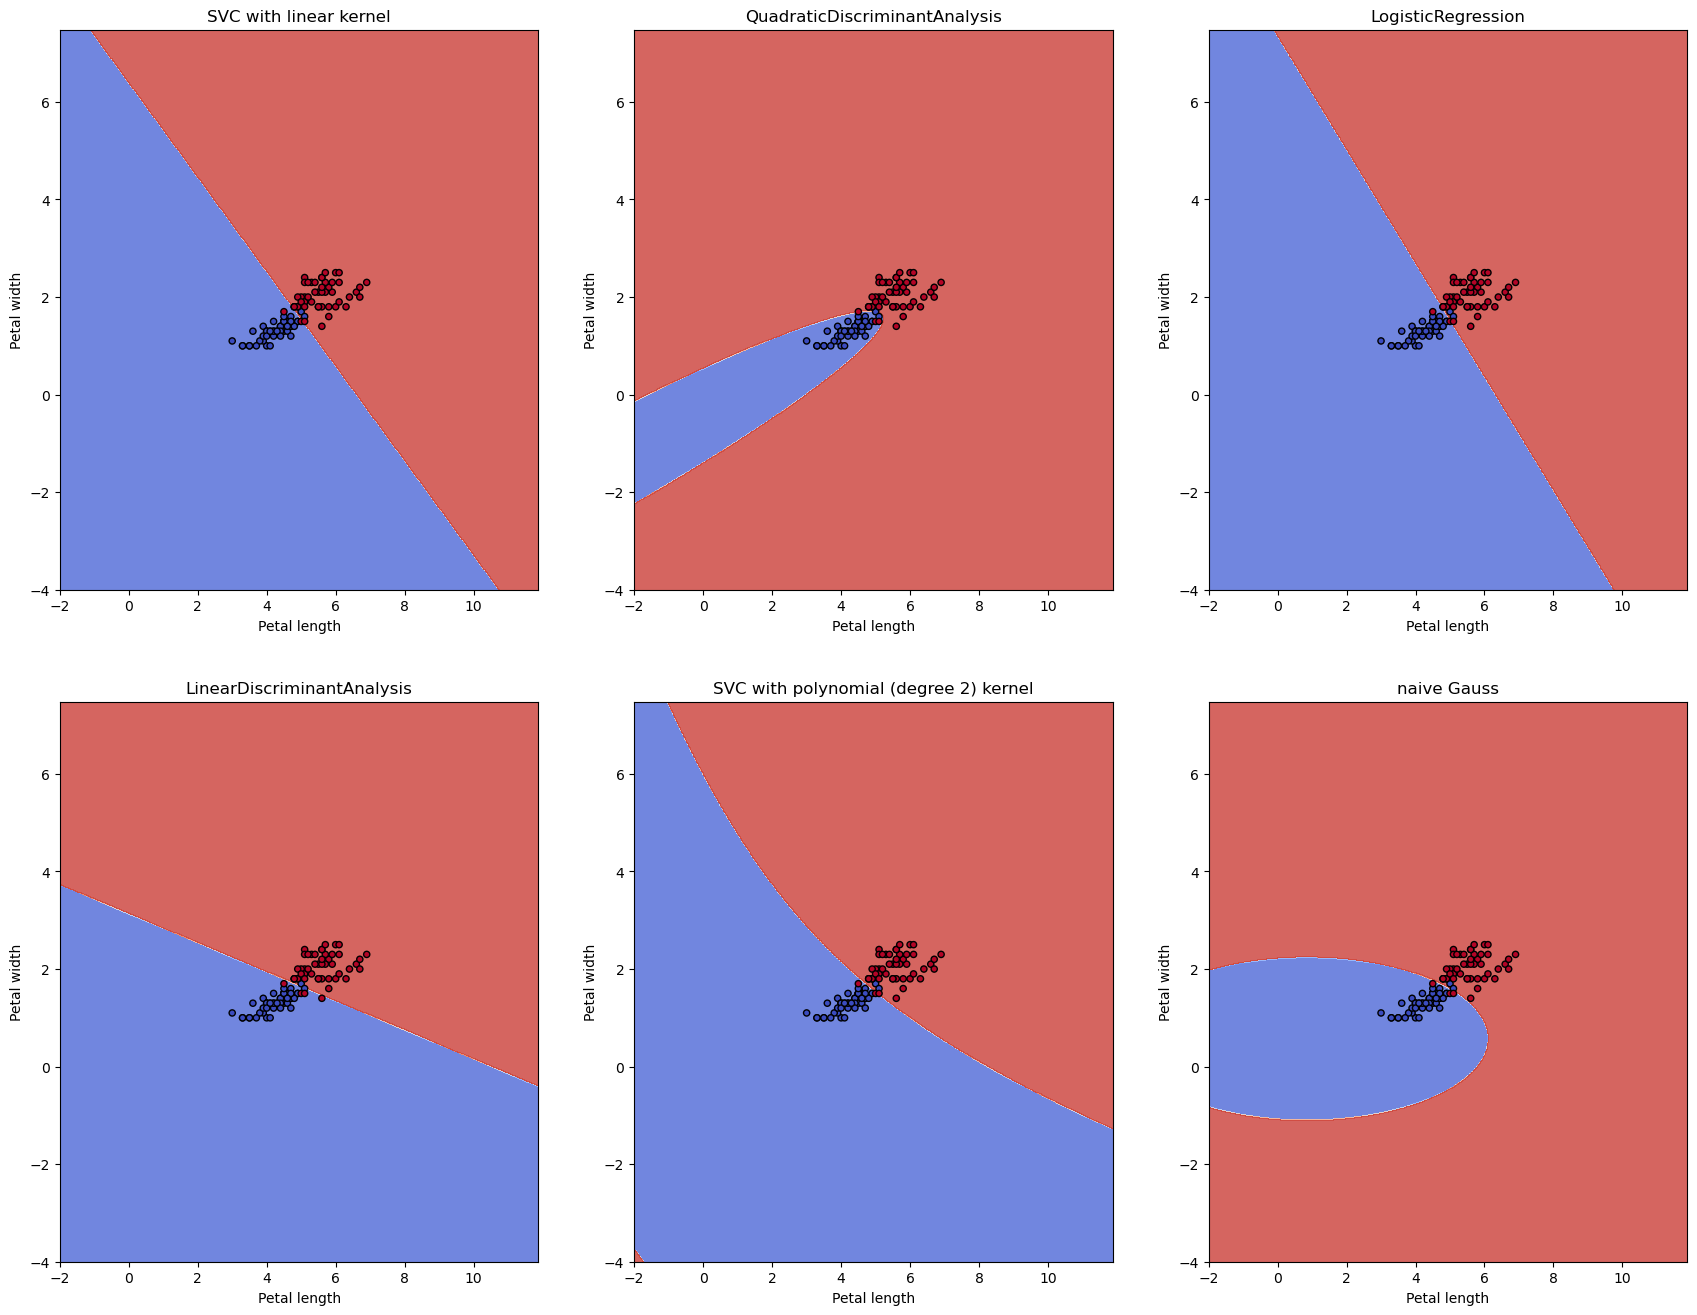

In [56]:
#Создание изображения 
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3,figsize=(21,16))
plt.subplots_adjust(wspace=0.2, hspace=0.2)



for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')

    ax.set_title(title)

plt.show()

# Для каждого признака Линейный дискр

# Задание 3

In [57]:
models1 = [LinearDiscriminantAnalysis(solver="svd", store_covariance=True)]#линейный дискриминант 

# title for the plots
titles1 = [

          'LinearDiscriminantAnalysis'
]

clf

GaussianNB()

In [58]:
#все признаки
X = iris.data[iris.target!=0, :4] 

y = iris.target[iris.target!=0]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
X0, X1, X2, X3 = X[:, 0], X[:, 1], X[:, 2] , X[:, 3]  #все признаки (их значения)

In [60]:
xx, yy = make_meshgrid(X0, X0) #6 штук сравнений 
xx1, yy1 = make_meshgrid(X0, X1) #6 штук сравнений 
xx2, yy2 = make_meshgrid(X0, X2)
xx3, yy3 = make_meshgrid(X0, X3)
xx4, yy4 = make_meshgrid(X1, X0)
xx5, yy5 = make_meshgrid(X1, X1)
xx6, yy6 = make_meshgrid(X1, X2)
xx7, yy7 = make_meshgrid(X1, X3)
xx8, yy8 = make_meshgrid(X2, X0)
xx9, yy9 = make_meshgrid(X2, X1)
xx10, yy10 = make_meshgrid(X2, X2)
xx11, yy11 = make_meshgrid(X2, X3)
xx12, yy12 = make_meshgrid(X3, X0)
xx13, yy13 = make_meshgrid(X3, X1)
xx14, yy14 = make_meshgrid(X3, X2)
xx15, yy15 = make_meshgrid(X3, X3)

# XX = []
# XX.extend([xx, xx1, xx2 , xx3, xx4, xx5])
# YY = []
# YY.extend([yy, yy1, yy2 , yy3, yy4, yy5])
# len(XX)
FEAR = list()
FEAR.append([X0,X0])
FEAR.append([X0,X1])
FEAR.append([X0,X2])
FEAR.append([X0,X3])

FEAR.append([X1,X0])
FEAR.append([X1,X1])
FEAR.append([X1,X2])
FEAR.append([X1,X3])

FEAR.append([X2,X0])
FEAR.append([X2,X1])
FEAR.append([X2,X2])
FEAR.append([X2,X3])

FEAR.append([X3,X0])
FEAR.append([X3,X1])
FEAR.append([X3,X2])
FEAR.append([X3,X3])

COO = list()
COO.append([xx,yy])
COO.append([xx1,yy1])
COO.append([xx2,yy2])
COO.append([xx3,yy3])
COO.append([xx4,yy4])
COO.append([xx5,yy5])
COO.append([xx6,yy6])
COO.append([xx7,yy7])
COO.append([xx8,yy8])
COO.append([xx9,yy9])
COO.append([xx10,yy10])
COO.append([xx11,yy11])
COO.append([xx12,yy12])
COO.append([xx13,yy13])
COO.append([xx14,yy14])
COO.append([xx15,yy15])


len(COO[0])

2

In [84]:
(FEAR)

[[array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
         6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
         6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
         5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8,
         7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8,
         6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1,
         6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7,
         6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
  array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
         6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
         6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
         5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8,
         7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8,
         6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.

In [62]:
len(COO)

16

In [63]:
def plot_contours(ax, clf, xxx, yyy, **params):
    Z = clf.predict(np.c_[2*xxx.ravel(), 2*yyy.ravel()])
    Z = Z.reshape((2*xxx).shape)

    out = ax.contourf(2*xxx, 2*yyy, Z, **params)
    return out

In [95]:
len(feature[0])

100

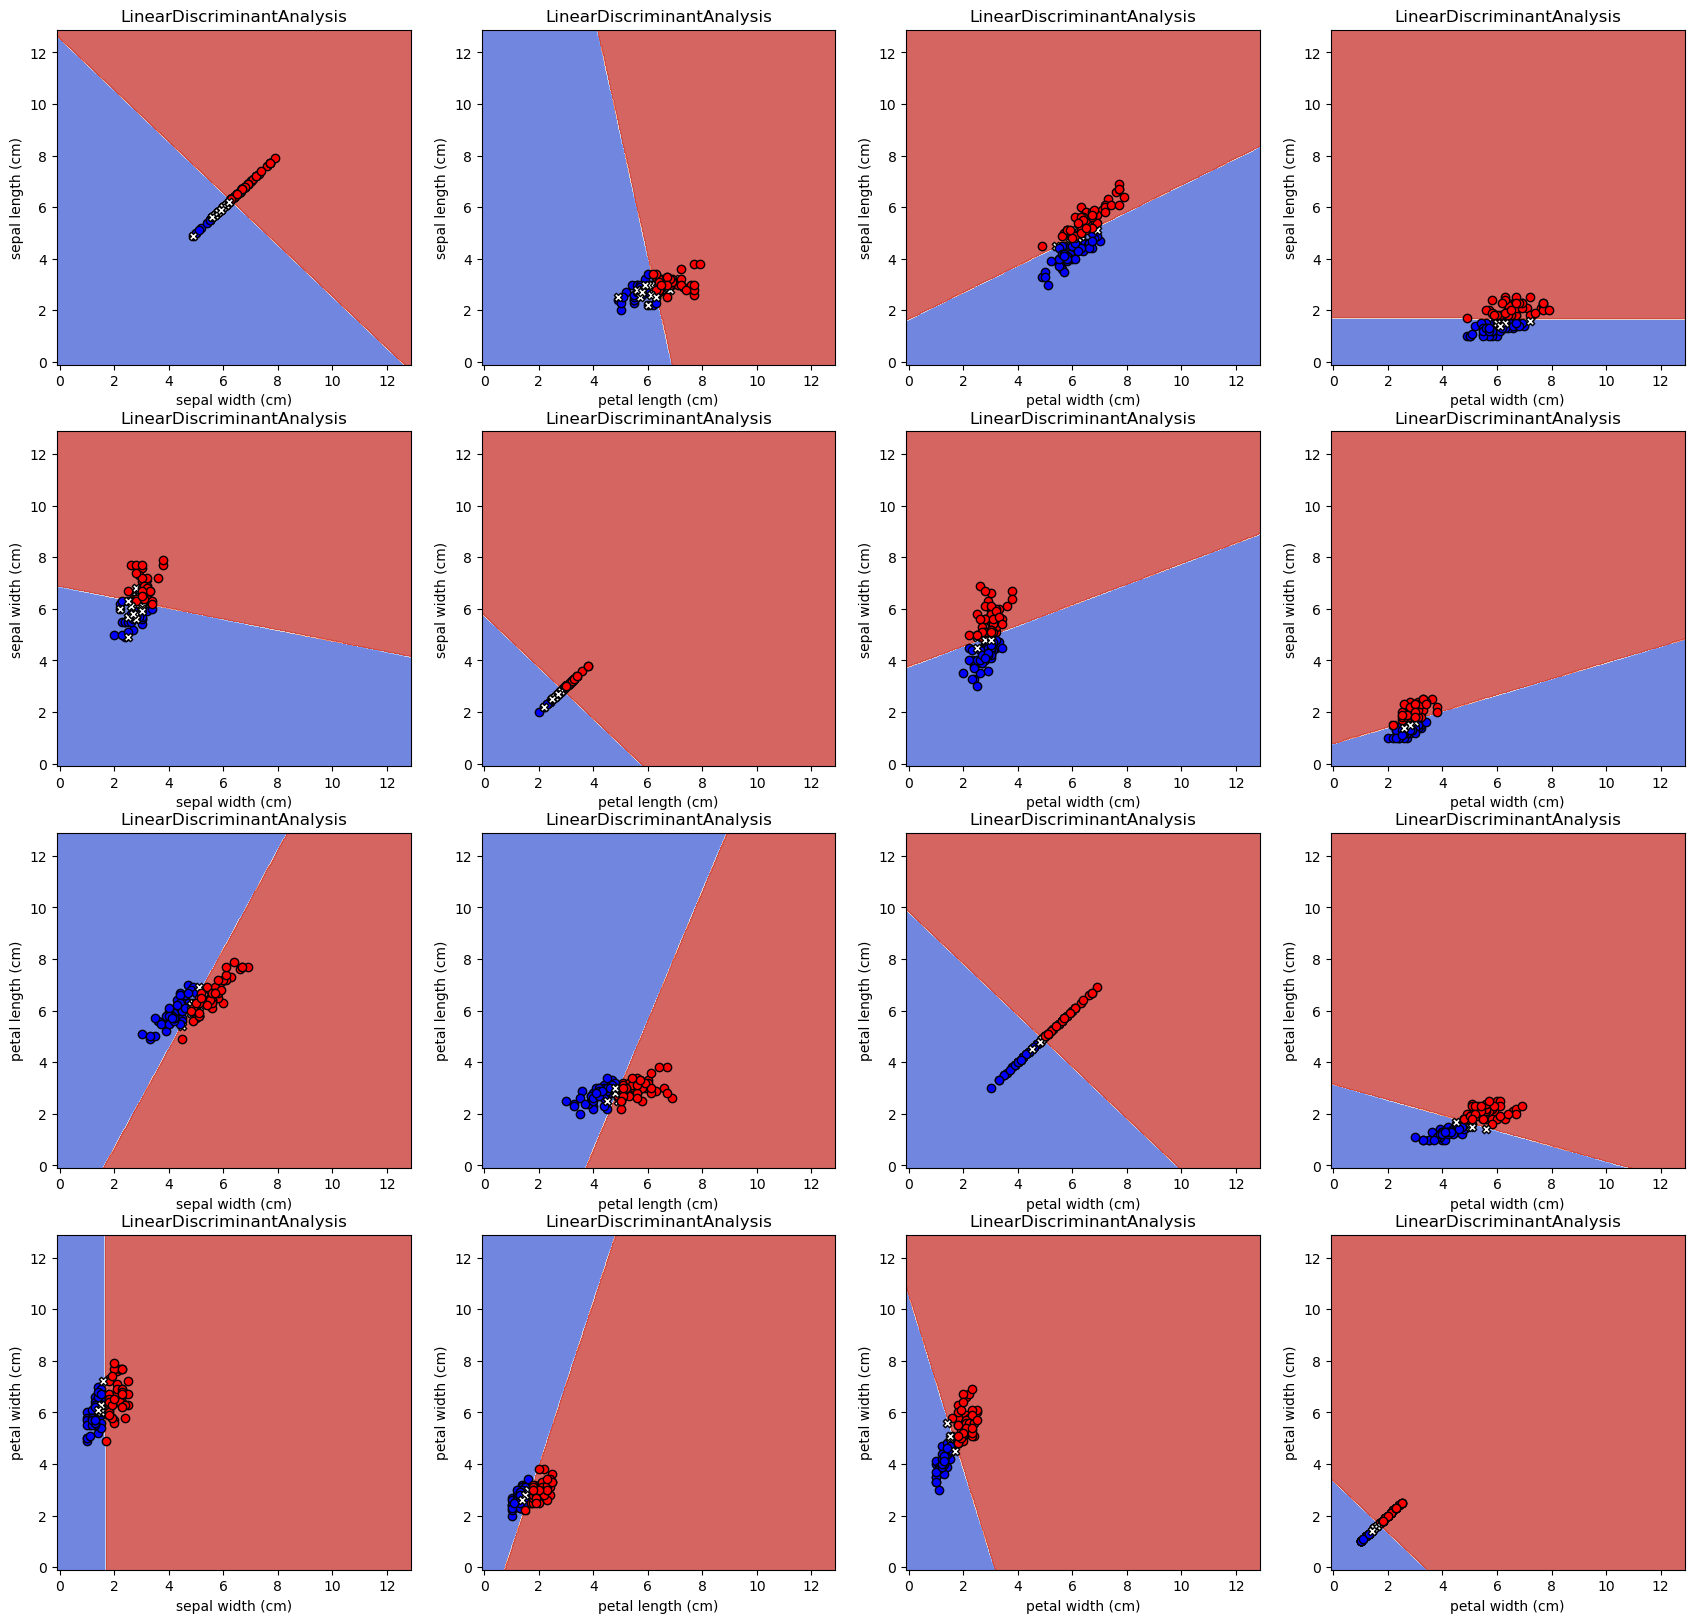

In [97]:
#Создание изображения 
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(4, 4,figsize=(21,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
i = 0
j = 0
f1 = 0
f2 = 0

for coord,feature, ax in zip(COO, FEAR, sub.flatten()): #16
    if j<4:
        for clf in models1:
            clf.fit(X[:, [i, j]], y)
        j=j+1
    else:
        i = i+1
        j=0
        for clf in models1:
            clf.fit(X[:, [i, j]], y)
        j=j+1

    
    #preds = clf.predict(X)
    ret = np.stack ((FEAR[f1][0], FEAR[f1][1]),1)
    preds = clf.predict(ret)
    f1=f1+1
        
    plot_contours(ax, clf, coord[0], coord[1], cmap=plt.cm.coolwarm, alpha=0.8)
#for pred in 

    for u in range(X.shape[0]):
        #print(preds[u], y[u])
        marker = "o"
        if preds[u]==1:
            color = "blue"
            #print("blue")
        if preds[u]==2:
            color = "red"
        if y[u]!=preds[u]:
            marker="X"
            color = "white"
        #print(color)
        ax.scatter(feature[0][u], feature[1][u], color=color, marker= marker, edgecolors='k')

    #ax.scatter(feature[0], feature[1], c=y, cmap=plt.cm.coolwarm, s=20,marker='o', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    if j>=4:
        ax.set_xlabel(iris.feature_names[j-1])  
    else:
        ax.set_xlabel(iris.feature_names[j])
    ax.set_ylabel(iris.feature_names[i])

    ax.set_title('LinearDiscriminantAnalysis')
    
plt.show()

In [98]:
import pandas as pd

df = pd.DataFrame(iris.data)
df['target'] = iris.target
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [99]:
st = df.groupby('target').agg(['mean','std']).T
st

target         0         1         2
0 mean  5.006000  5.936000  6.588000
  std   0.352490  0.516171  0.635880
1 mean  3.428000  2.770000  2.974000
  std   0.379064  0.313798  0.322497
2 mean  1.462000  4.260000  5.552000
  std   0.173664  0.469911  0.551895
3 mean  0.246000  1.326000  2.026000
  std   0.105386  0.197753  0.274650